<a href="https://colab.research.google.com/github/ubsuny/MLFringe-Contrast-CP2P2024/blob/main/tf_cone_intensity_1PGMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

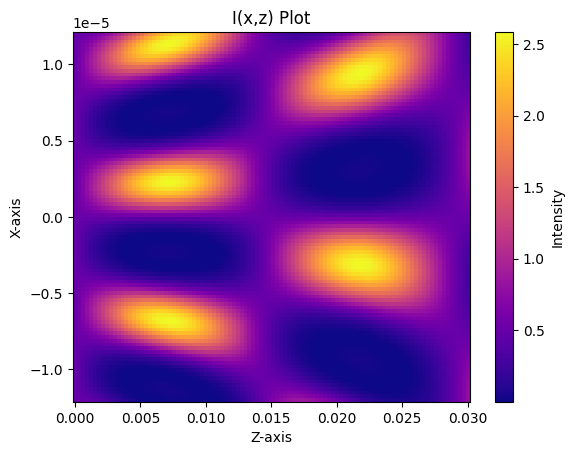

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Parameters
pi = np.pi
cos_term = tf.constant(np.cos(pi/4), dtype=tf.float64)
sin_term = tf.constant(np.sin(pi/4), dtype=tf.float64)
p_G = 2.4E-6
L_1 = 3
lam = 4E-10

# Constants (calculated from parameters)
k_G = 2*np.pi/p_G
K_0 = 2*np.pi/lam
x_1 = p_G/2

# Range for z and x
x_values = np.linspace(-5* p_G,  5* p_G, 100, dtype=np.float64)  # Considering micrometers
z_values = np.linspace(0, 0.01*L_1, 100, dtype=np.float64)   # Considering meters

# Initialize the intensity array
intensity_values = tf.Variable(tf.zeros((len(z_values), len(x_values)), dtype=tf.float64))

# Power factor to control the cone shape spread
power_factor = 30  # Experiment with different values

# Calculate the intensity for each combination of z and x
for i, z in enumerate(z_values):
    for j, x in enumerate(x_values):
        # Modify the x term and introduce a factor to spread the pattern in the y-axis
        x_term = tf.pow(x, power_factor)

        # Calculate the exponential terms within the summation
        exp_terms = tf.reduce_sum([
            2/(pi*m) * tf.exp((-1j * m * k_G )* x_1) *
            tf.exp((-1j * m**2 * k_G**2 / (2 * K_0 * (1 + z / L_1))) * z) *
            tf.exp((1j * m * k_G * power_factor / (1 + z / L_1/2))* x)
            for m in [-1, 1]
        ])

        # Cast the complex tensor to float64 before performing multiplication
        exp_terms_real = tf.cast(tf.math.real(exp_terms), tf.float64)
        exp_terms_imag = tf.cast(tf.math.imag(exp_terms), tf.float64)

        # Perform multiplication with sin_term
        exp_terms_combined = exp_terms_real * sin_term

        # Calculate the intensity for the given z and x
        intensity_values[j, i].assign(tf.abs(cos_term + exp_terms_combined)**2)

# Create a 2D plot
z_mesh, x_mesh = tf.meshgrid(z_values, x_values)
plt.pcolormesh(z_mesh.numpy(), x_mesh.numpy(), intensity_values.numpy(), cmap='plasma')
plt.xlabel('Z-axis')
plt.ylabel('X-axis')
plt.title('I(x,z) Plot')
plt.colorbar(label='Intensity')
plt.show()
